# Online Payments Fraud Detection

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import seaborn as sns


In [2]:
payment_df = pd.read_csv('Online Payments Fraud Detection.csv')
#C:\Users\Cristian\Desktop\DS FOR ANALYTICS\fraudes

In [3]:
payment_df.shape

(6362620, 11)

In [4]:
payment_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
payment_df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
payment_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
payment_df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
#check for missing Data using isna().sum()
payment_df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
#Checking which recipients stand out
payment_df.nameDest.unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1850423904',
       'C1881841831', 'C2080388513'], dtype=object)

In [11]:
#Investigating to check unique customers
payment_df.nameOrig.unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

In [12]:
#investigating to see how many times a customer started a transaction
payment_df.nameOrig.value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [13]:
#How many times a recipient got a transaction
payment_df.nameDest.value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [14]:
payment_df.amount.max()

92445516.64

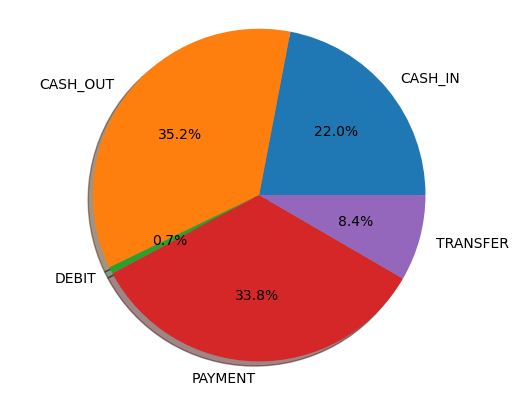

In [15]:
#Checking the distribution of the type of transactions made

labels = payment_df['type'].astype('category').cat.categories.tolist()
counts = payment_df['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [16]:
#Investigating how many times a particular type of transaction was carried out.
payment_df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [17]:
#Investigating the top customers and the type of transactions they initiated
top_ten = payment_df.groupby('nameOrig').type.sum().sort_values(ascending=False)[:10]
top_ten

nameOrig
C796574716     TRANSFERTRANSFER
C374097252     TRANSFERTRANSFER
C2076561122    TRANSFERTRANSFER
C958689035     TRANSFERTRANSFER
C850407982     TRANSFERTRANSFER
C813633808     TRANSFERTRANSFER
C1162384917    TRANSFERTRANSFER
C24957224      TRANSFERTRANSFER
C166311678     TRANSFERTRANSFER
C1991760030    TRANSFERTRANSFER
Name: type, dtype: object

In [18]:
#Checking the average amounttransacted
payment_df['amount'].mean()

179861.90354912292

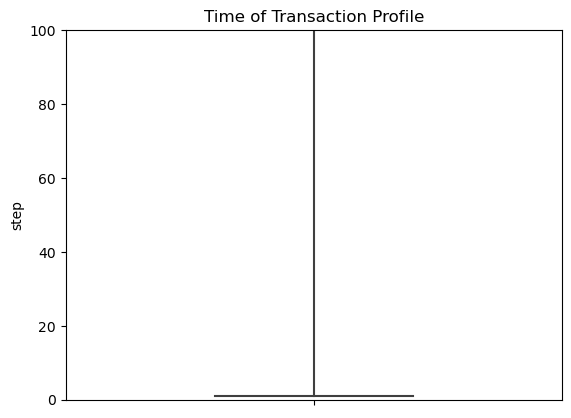

In [19]:
sns.boxplot(y=payment_df.step)
plt.title('Time of Transaction Profile')
plt.ylim(0,100)
plt.show()

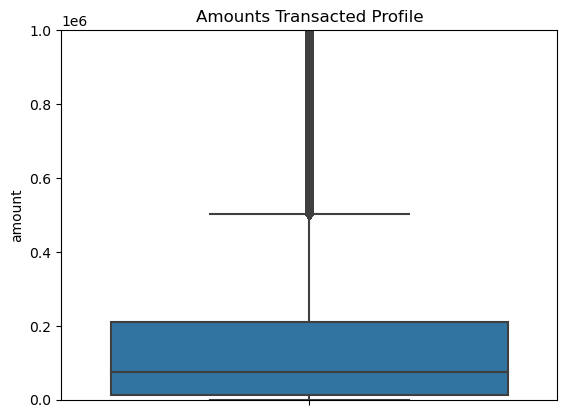

In [20]:
sns.boxplot(y=payment_df.amount)
plt.title('Amounts Transacted Profile')
plt.ylim(0,1000000)
plt.show()

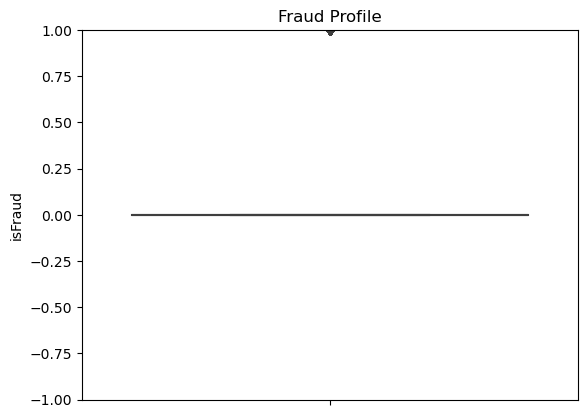

In [21]:
sns.boxplot(y=payment_df.isFraud)
plt.title('Fraud Profile')
plt.ylim(-1,1)
plt.show()

In [22]:
# Sepearating Fraudulent transaction from non fraudulent

Fraudulent_Transaction = payment_df[payment_df.isFraud ==1]
Not_Fraudulent_Transaction = payment_df[payment_df.isFraud ==0]

In [23]:
print('Fraudulent Transaction: {}'.format(len(Fraudulent_Transaction)))
print('Not Fraudulent Transaction: {}'.format(len(Not_Fraudulent_Transaction)))
   

Fraudulent Transaction: 8213
Not Fraudulent Transaction: 6354407


In [24]:
#Understanding The statistical nature of Non Fraudulent Transactions.

Not_Fraudulent_Transaction.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [25]:
#Understanding The statistical nature of Fraudulent Transactions.

Fraudulent_Transaction.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [26]:
#Comparing both class of transactions
payment_df.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,243.235663,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [27]:
Non_Fraudulent_Sample = Not_Fraudulent_Transaction.sample(n=1142)

In [28]:
new_dataset = pd.concat([Non_Fraudulent_Sample, Fraudulent_Transaction], axis=0)

In [29]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2798481,217,CASH_OUT,366138.32,C1699094295,0.00,0.00,C689886945,896859.23,1262997.55,0,0
5700375,398,TRANSFER,22647.67,C730026660,0.00,0.00,C1130132761,82893.04,105540.71,0,0
6323144,688,CASH_OUT,176098.62,C290001233,0.00,0.00,C154865503,479616.85,655715.47,0,0
1748635,161,CASH_IN,196288.56,C1475682270,22932470.88,23128759.44,C1656726101,4025863.36,4255451.36,0,0
2617953,208,CASH_OUT,117033.08,C879497733,38837.00,0.00,C2130912372,0.00,117033.08,0,0


In [30]:
new_dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [31]:
new_dataset['isFraud'].value_counts()

1    8213
0    1142
Name: isFraud, dtype: int64

In [32]:
new_dataset.shape

(9355, 11)

In [33]:
#Checking to see if the new dataset we obtained is a good i.e does not deviate significantly from our original dataset
new_dataset.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,248.348511,1.746029e+05,7.775241e+05,796341.616716,974548.125298,1.097641e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,544249.619075,1.279708e+06,0.001948


In [34]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop=None,)

In [35]:
#perform one-hot encoding on 'type' column 
encoder_df =  pd.get_dummies(new_dataset, columns=['type','nameOrig','nameDest'], prefix=['type','nameOrig','nameDest'])

In [36]:
encoder_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,...,nameDest_M963147329,nameDest_M964190176,nameDest_M964562039,nameDest_M968890544,nameDest_M97570729,nameDest_M981805279,nameDest_M98292621,nameDest_M984157937,nameDest_M993252734,nameDest_M998538853
2798481,217,366138.32,0.00,0.00,896859.23,1262997.55,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5700375,398,22647.67,0.00,0.00,82893.04,105540.71,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6323144,688,176098.62,0.00,0.00,479616.85,655715.47,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1748635,161,196288.56,22932470.88,23128759.44,4025863.36,4255451.36,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2617953,208,117033.08,38837.00,0.00,0.00,117033.08,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
encoder_df.shape

(9355, 18667)

In [38]:
# Check result of one-hot encoding
encoder_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,...,nameDest_M963147329,nameDest_M964190176,nameDest_M964562039,nameDest_M968890544,nameDest_M97570729,nameDest_M981805279,nameDest_M98292621,nameDest_M984157937,nameDest_M993252734,nameDest_M998538853
2798481,217,366138.32,0.00,0.00,896859.23,1262997.55,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5700375,398,22647.67,0.00,0.00,82893.04,105540.71,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6323144,688,176098.62,0.00,0.00,479616.85,655715.47,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1748635,161,196288.56,22932470.88,23128759.44,4025863.36,4255451.36,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2617953,208,117033.08,38837.00,0.00,0.00,117033.08,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:

encoder_df.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,...,nameDest_M963147329,nameDest_M964190176,nameDest_M964562039,nameDest_M968890544,nameDest_M97570729,nameDest_M981805279,nameDest_M98292621,nameDest_M984157937,nameDest_M993252734,nameDest_M998538853
6362615,743,339682.13,339682.13,0.0,0.00,339682.13,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6362616,743,6311409.28,6311409.28,0.0,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6362617,743,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6362618,743,850002.52,850002.52,0.0,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6362619,743,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Target, Feature Split

In [40]:
Y = encoder_df['isFraud']

In [41]:
features = encoder_df.drop('isFraud', axis=1)

In [42]:
X = features

In [43]:
Y.head()

2798481    0
5700375    0
6323144    0
1748635    0
2617953    0
Name: isFraud, dtype: int64

In [44]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M963147329,nameDest_M964190176,nameDest_M964562039,nameDest_M968890544,nameDest_M97570729,nameDest_M981805279,nameDest_M98292621,nameDest_M984157937,nameDest_M993252734,nameDest_M998538853
2798481,217,366138.32,0.00,0.00,896859.23,1262997.55,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5700375,398,22647.67,0.00,0.00,82893.04,105540.71,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6323144,688,176098.62,0.00,0.00,479616.85,655715.47,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1748635,161,196288.56,22932470.88,23128759.44,4025863.36,4255451.36,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2617953,208,117033.08,38837.00,0.00,0.00,117033.08,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#create X_train, X_test, Y_train, Y_test
# using test_size of 20%

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [46]:
print('\n',X_train.head(2))

print('\n',X_test.head(2))

print('\n',Y_train.head(2))

print('\n',Y_test.head(2))


          step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
5162648   358   10358.27       10358.27             0.0             0.0   
6055673   497  224570.45      224570.45             0.0             0.0   

         newbalanceDest  isFlaggedFraud  type_CASH_IN  type_CASH_OUT  \
5162648             0.0               0             0              0   
6055673             0.0               0             0              0   

         type_DEBIT  ...  nameDest_M963147329  nameDest_M964190176  \
5162648           0  ...                    0                    0   
6055673           0  ...                    0                    0   

         nameDest_M964562039  nameDest_M968890544  nameDest_M97570729  \
5162648                    0                    0                   0   
6055673                    0                    0                   0   

         nameDest_M981805279  nameDest_M98292621  nameDest_M984157937  \
5162648                    0                   0   

# Training our Classification Model with a Logistic Regression Classifier

In [47]:
model = LogisticRegression()

In [48]:
#Training model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

In [49]:
model_pred = model.predict(X_test)

In [50]:
# Obtain model probabilities
probs = model.predict_proba(X_test)

# Logistic Regression Model Evaluation

In [51]:
print('\nClassification Report:')
print(classification_report(Y_test, model_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.60      0.71       228
           1       0.95      0.99      0.97      1643

    accuracy                           0.94      1871
   macro avg       0.92      0.79      0.84      1871
weighted avg       0.94      0.94      0.94      1871



In [52]:
# check True Negatives/Positives, False Negatives/Positives
pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'], 
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),136,92
Actually Positive(1),17,1626


In [53]:
# Print confusion matrix using predictions in context 
pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),136,92
Actually Fraud(1),17,1626


In [54]:
# ACCURACY SCORE
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9417423837520043


In [55]:
# Calculate average precision and the P-R curve
average_precision = average_precision_score(Y_test, model_pred)
average_precision

0.9457425681380812

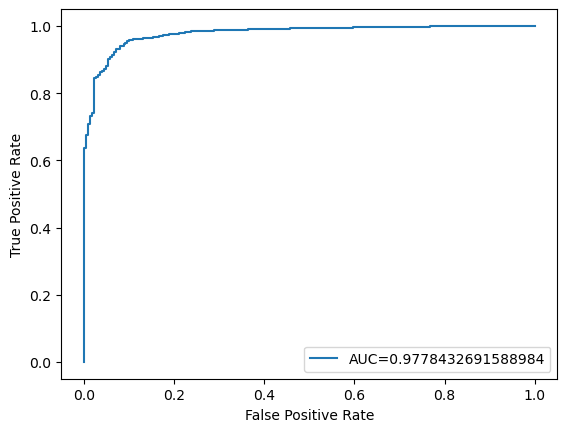

In [56]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [57]:
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:,1]))

AUC Score:
0.9778432691588984


# Training with Random Forest Classifier

In [58]:
# Define the model as the random forest
model = RandomForestClassifier(random_state=5, n_estimators=20)

In [59]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [60]:
model_pred = model.predict(X_test)

In [61]:
# Obtain model probabilities
probs = model.predict_proba(X_test)

# Random Forest Model Evaluation

In [62]:
# Print classification report using predictions
print('Classification_Report:\n',classification_report(Y_test, model_pred))

Classification_Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       228
           1       0.98      1.00      0.99      1643

    accuracy                           0.98      1871
   macro avg       0.97      0.94      0.96      1871
weighted avg       0.98      0.98      0.98      1871



In [63]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [64]:
model_pred = model.predict(X_test)

In [65]:
# Obtain model probabilities
probs = model.predict_proba(X_test)

# Random Forest Model Evaluation

In [66]:
# Print classification report using predictions
print('Classification_Report:\n',classification_report(Y_test, model_pred))

Classification_Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       228
           1       0.98      1.00      0.99      1643

    accuracy                           0.98      1871
   macro avg       0.97      0.94      0.96      1871
weighted avg       0.98      0.98      0.98      1871



In [67]:
# Print confusion matrix using predictions
pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'], 
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),203,25
Actually Positive(1),8,1635


In [68]:
# Print confusion matrix using predictions in Context
pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),203,25
Actually Fraud(1),8,1635


In [69]:
# ACCURACY SCORE
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9823623730625334


In [70]:
# Calculate average precision and the P-R curve
average_precision = average_precision_score(Y_test, model_pred)
average_precision

0.9844197360198684

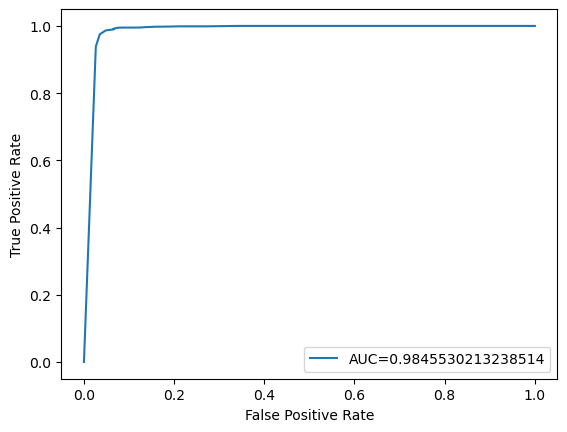

In [71]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [72]:
# Print ROC_AUC score using probabilities
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:, 1]))



AUC Score:
0.9845530213238514
